Questions to be answered:

1. Does the higher the tempo is of a song determine how popular it is?
2. Which genre had the most hit songs and which year did it have the most?
3. Does the top 2 artist with the most hit songs in the hip hop category have a similar length for their songs?

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('songs_normalize.csv')
df.shape

(1997, 18)

In [3]:
df_selected = df[['artist','song','duration_ms','explicit','popularity','year','tempo','genre']]

In [4]:
df_selected

,artist,song,duration_ms,explicit,popularity,year,tempo,genre
0,K-Ci & JoJo,Crazy,262773,False,30,2019,116.097,"pop, R&B"
1,Angie Martinez,If I Could Go! (feat. Lil' Mo & Sacario),244466,False,40,2019,195.685,pop
2,Aaliyah,Rock The Boat,275026,False,0,2019,92.988,"hip hop, pop, R&B"
3,Liberty X,Just A Little,237359,False,43,2019,103.887,pop
4,Lil' Kim,Magic Stick,359973,True,47,2019,92.980,"hip hop, pop, R&B"
...,...,...,...,...,...,...,...,...
1992,Creed,Higher,316733,False,69,1999,155.827,"pop, rock, metal"
1993,Crazy Town,Butterfly,216733,False,71,1999,103.502,"rock, metal"
1994,Dido,Thank You,218360,False,73,1999,79.984,pop
1995,Anastacia,Sick and Tired,212266,False,56,1999,99.848,pop


In [5]:
df_removeDup = df_selected.drop_duplicates(subset=['artist','song'],keep='last')
df_removeDup.shape

(1923, 8)

In [6]:
df_removeDup.loc[df_removeDup['genre'] == 'set()', 'genre'] = 'uncategorized'

In [7]:
#Question 1
#Does the higher the tempo is of a song determine how popular it is?
#Look at the top 100 most popular songs
df_tempo_popularity = df_removeDup[['artist','song','popularity','tempo']]
df_top100_popularity = df_tempo_popularity.nlargest(100,'popularity')
df_top100_popularity

,artist,song,popularity,tempo
633,The Neighbourhood,Sweater Weather,89,124.053
625,Tom Odell,Another Love,88,122.769
1690,Eminem,Without Me,87,112.238
183,Billie Eilish,lovely (with Khalid),86,115.284
489,WILLOW,Wait a Minute!,86,101.003
...,...,...,...,...
194,Post Malone,Better Now,80,145.038
195,Panic! At The Disco,High Hopes,80,82.014
227,Imagine Dragons,Whatever It Takes,80,134.945
231,Chord Overstreet,Hold On,80,119.949


In [8]:
#Look at the top 100 highest tempo songs
df_tempo_popularity = df_removeDup[['artist','song','popularity','tempo']]
df_top100_tempo = df_tempo_popularity.nlargest(100,'tempo')
df_top100_tempo

,artist,song,popularity,tempo
1461,The Pussycat Dolls,Buttons,68,210.851
878,Blake Shelton,Honey Bee,50,205.570
152,YG,"BIG BANK (feat. 2 Chainz, Big Sean, Nicki Minaj)",68,203.911
1817,112,Peaches & Cream,63,203.862
19,Mustard,Pure Water (with Migos),75,202.015
...,...,...,...,...
1161,Ray J,Sexy Can I feat. Yung Berg,1,172.155
1803,Nickelback,How You Remind Me,78,172.094
1056,Fabolous,Throw It In The Bag,59,172.049
626,2 Chainz,We Own It (Fast & Furious),69,171.999


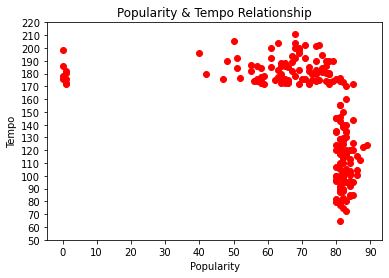

In [39]:
pdMergedList = pd.concat([df_top100_popularity, df_top100_tempo], join='outer')
pdMerged_nodupe = pdMergedList.drop_duplicates()
plt.scatter(pdMerged_nodupe['popularity'],pdMerged_nodupe['tempo'], marker = 'o', color = 'r')
plt.title('Popularity & Tempo Relationship')
plt.xlabel('Popularity')
plt.ylabel('Tempo')
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(50,230,10))
plt.show()

Interpret the results:

My goal was to find if a hit song that has a high tempo also means it has a high popularity rating. There is a lot of songs around the same tempo of 170-180 and same popularity of 70-80, but there is only a 3-4 songs that have a high tempo and popularity. Based on this information there is no correlation for their relationship. For example the least popular songs with a rating of less than 10 has nearly the highest tempos. There is also a lot of songs with popularity of more than 80, but have a tempo of less than 150. Overall there is no clear proof that a high tempo has a correlation with its popularity.

In [11]:
#Question 2
#Which genre had the most hit songs and which year did it have the most?

df_removeDup['genre'].value_counts()
#Pop has the most hit songs

pop                                      410
hip hop, pop                             264
hip hop, pop, R&B                        234
pop, Dance/Electronic                    213
pop, R&B                                 170
hip hop                                  120
hip hop, pop, Dance/Electronic            75
rock                                      57
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
uncategorized                             22
latin                                     15
hip hop, Dance/Electronic                 15
hip hop, pop, latin                       14
pop, rock, metal                          14
R&B                                       13
pop, rock, Dance/Electronic               12
country                                    9
metal                                      9
hip hop, p

In [12]:
#Count songs by year and create df with only genre == pop
df_pop = df_removeDup.loc[df_removeDup['genre'] == 'pop']
df_pop['year'].value_counts()

2012    31
2014    30
2017    28
2013    27
2019    25
2001    25
2006    24
2008    22
2015    22
2009    19
2010    19
2002    17
2016    16
2000    16
2018    15
2004    15
2007    13
2003    13
2011    12
1999    11
2005    10
Name: year, dtype: int64

In [13]:
df_pop

,artist,song,duration_ms,explicit,popularity,year,tempo,genre
1,Angie Martinez,If I Could Go! (feat. Lil' Mo & Sacario),244466,False,40,2019,195.685,pop
3,Liberty X,Just A Little,237359,False,43,2019,103.887,pop
12,Shawn Mendes,Señorita,190799,False,78,2019,116.967,pop
13,Ariana Grande,7 rings,178626,True,83,2019,140.048,pop
17,Lewis Capaldi,Someone You Loved,182160,False,84,2019,109.891,pop
...,...,...,...,...,...,...,...,...
1985,Céline Dion,That's the Way It Is,241373,False,64,1999,93.040,pop
1987,Savage Garden,Crash and Burn,281466,False,54,1999,102.030,pop
1991,Christina Aguilera,Come on over Baby (All I Want Is You) - Radio ...,203333,False,64,1999,118.903,pop
1994,Dido,Thank You,218360,False,73,1999,79.984,pop


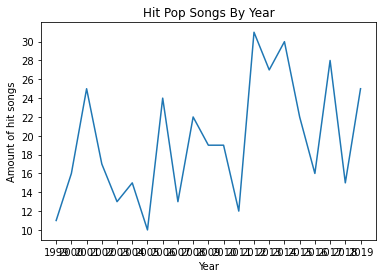

In [45]:
#Created bar chart with hit songs by year
df_pop['year'].value_counts().sort_values().sort_index().plot(kind = 'line')
plt.title("Hit Pop Songs By Year")
plt.xlabel('Year')
plt.ylabel('Amount of hit songs')
plt.xticks(np.arange(1999,2020,1))
plt.yticks(np.arange(10,31,2))
plt.show()

There are a lot of songs that are classfied as multiple genres, but pop songs have the most hits from 1999-2019. Pop has the most hit songs at 411. The next two genres with the most hit songs are hip hop/pop and hip hop/pop/r&b. Each of these genres have less than 270 hit songs. Hit pop songs fluctuate very frequently by year. For example, 2011 has some of the lowest amount of hit songs, but the next year 2012, skyrockets to an all time high. After 2011 hit songs had a steep increase and then a slightly steady decrease. In 2015 the amount of songs is around 23, in 2016 it is near 15, but in 2017 it nearly doubles. Based on the data pop songs have the most hit songs and started performing better after 2011, but that performance fluctuates a lot.

In [51]:
#Question 3
#Does the artist with the most hit songs have a similar length for their songs?
df_lessColumns = df_removeDup[['artist','song','duration_ms','genre']]

In [52]:
df_hiphop = df_lessColumns.loc[df_removeDup['genre'] == 'hip hop']
df_hiphop

,artist,song,duration_ms,genre
14,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,157560,hip hop
20,NLE Choppa,Shotta Flow (feat. Blueface) [Remix],176631,hip hop
30,Lil Tecca,Ransom,131240,hip hop
34,Post Malone,Wow.,149546,hip hop
40,Polo G,Pop Out (feat. Lil Tjay),166560,hip hop
...,...,...,...,...
1908,JAY-Z,I Just Wanna Love U (Give It 2 Me),227866,hip hop
1935,Eminem,Stan,404106,hip hop
1967,Dr. Dre,The Next Episode,161506,hip hop
1973,JAY-Z,Big Pimpin',283066,hip hop


In [53]:
df_hiphop['artist'].value_counts()

Eminem                    20
Kanye West                16
JAY-Z                     12
Post Malone                8
Kendrick Lamar             6
XXXTENTACION               4
A Boogie Wit da Hoodie     3
Dr. Dre                    3
Gorillaz                   3
6ix9ine                    2
21 Savage                  2
Kodak Black                2
Juice WRLD                 2
J. Cole                    2
2Pac                       2
Terror Squad               1
Ylvis                      1
Kevin Lyttle               1
Nas                        1
N.E.R.D                    1
Kid Cudi                   1
Fatman Scoop               1
Mac Miller                 1
Rizzle Kicks               1
The Roots                  1
Guru Josh Project          1
Childish Gambino           1
Afroman                    1
The Notorious B.I.G.       1
Kent Jones                 1
A$AP Rocky                 1
Silentó                    1
Lil Tecca                  1
Polo G                     1
Dave          

In [54]:
df_eminem = df_hiphop.loc[df_removeDup['artist'] == 'Eminem']
df_eminem

,artist,song,duration_ms,genre
298,Eminem,River (feat. Ed Sheeran),221013,hip hop
638,Eminem,The Monster,250188,hip hop
643,Eminem,Berzerk,238746,hip hop
920,Eminem,Love The Way You Lie,263373,hip hop
934,Eminem,Not Afraid,248133,hip hop
1041,Eminem,We Made You,269613,hip hop
1047,Eminem,Crack A Bottle,297520,hip hop
1462,Eminem,Shake That,274440,hip hop
1469,Eminem,When I'm Gone,281320,hip hop
1496,Eminem,"Lose Yourself - From ""8 Mile"" Soundtrack",322226,hip hop


In [56]:
df_kanye = df_hiphop.loc[df_removeDup['artist'] == 'Kanye West']
df_kanye

,artist,song,duration_ms,genre
641,Kanye West,Black Skinhead,188013,hip hop
723,Kanye West,Mercy,329320,hip hop
1006,Kanye West,All Of The Lights,299613,hip hop
1173,Kanye West,Heartless,211000,hip hop
1186,Kanye West,Love Lockdown,270306,hip hop
1213,Kanye West,Stronger,311866,hip hop
1218,Kanye West,Can't Tell Me Nothing,271600,hip hop
1266,Kanye West,Flashing Lights,237506,hip hop
1276,Kanye West,Homecoming,203493,hip hop
1289,Kanye West,Good Life,207000,hip hop


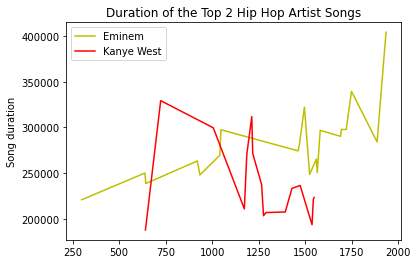

In [61]:
plt.plot(df_eminem.iloc[:,2], 'y')
plt.plot(df_kanye.iloc[:,2], 'r')
plt.title("Duration of the Top 2 Hip Hop Artist Songs")
plt.ylabel('Song duration')
plt.legend(['Eminem','Kanye West'])
plt.show()

I wanted to find if there was a similarity in the song duration of the top 2 hip hop artist. Eminem has the most hit songs at 20 and Kanye West was a close second at 16 songs. From the graph Eminem has a nearly constant increase in his song duration. His longest song is a little above 40000ms and his lowest being around 23000. As for Kanye West, his song length is very inconsistent. The line starts off below 20000ms then rises to its peak around 33000 and then has a steep decrease close to 23000. Based off the chart, Eminems songs duration average is higher than Kanye West.

Describe the data source and include its link

This data source contains data of hit songs from 1999-2019. It has information about each song from the artist that made it, song title, tempo, danceability, a popularity rating, etc. The data source contains everything that is needed to analyze a song in numbers form. The page link describes each columns and how it is scaled.
https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

Sumarize the main findings from this project as well as what you failed to find from the results. Describe what you want to further explore about the topic:


   I found that pop songs are the most popular songs and that its peak was in 2012. I also found that song with high tempo does not mean it will be popular. In some cases it showed the opposite. Lastly I found that Eminem has longer songs than Kanye West.
   I failed to find what makes a hit song. There is too many moving variables to predict the performance of a song. Based off the data there is no clear way to determine what makes people like a song. There are some songs with the lowest tempo in history, but people love it.